# Travail Réalisé par : Ilyes REZGUI                                                                           
## M1 Recherche ISI Ariana <div style="position: absolute; top: 0; right: 0;"> <img src="images/isi.png" alt="isi" style="width: 180px; height: auto;margin-left:1000px"> </div>





Dans ce travail, nous avons l'intention d'appliquer deux techniques de machine learning, à savoir le K plus proche voisin (KNN) et le K-moyennes (K-means), pour la détection des design patterns dans le code source en Java. Le KNN est une méthode d'apprentissage supervisé utilisée pour la classification et la régression, qui se base sur la similarité entre les données pour prédire l'appartenance à une classe. D'autre part, le K-means est un algorithme de clustering non supervisé largement utilisé pour regrouper des données similaires en clusters. En combinant ces deux approches, nous espérons être en mesure de détecter efficacement les motifs de conception dans le code Java, ce qui peut contribuer à améliorer la maintenance, la compréhension et la qualité du logiciel.







## 1- Importation des librairies nécessaires

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier



## 2- Dataset & Prétraitement
Remarque : Pour la préparation de l'ensemble de données, j'ai travaillé avec un auto-encodeur pour encoder le code source en des vecteurs de caractéristiques numériques.

In [2]:
data=pd.read_csv("Ilyes_REZGUI_Dataset.csv")
data.head()

,Directory,File,DesignPattern,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,...,Feature_290,Feature_291,Feature_292,Feature_293,Feature_294,Feature_295,Feature_296,Feature_297,Feature_298,Feature_299
0,111,AbstractFactory,AbstractFactory,0.023346,-0.059852,-0.046176,-0.097405,-0.044382,-0.012018,-0.005196,...,-0.112120,-0.044441,-0.052856,0.090196,0.121308,0.013891,-0.010730,-0.110684,0.001927,-0.065017
1,111,DPAbstractFactory,Unknown,-0.010441,-0.057699,-0.043226,-0.051360,-0.076978,-0.026927,-0.028718,...,-0.114367,-0.098888,-0.042778,0.084722,0.167180,0.040148,-0.095231,-0.020824,-0.011934,-0.075166
2,111,FactoryNotebookGamer,AbstractFactory,-0.024173,-0.085740,-0.110586,-0.093645,-0.067076,-0.074021,-0.015681,...,-0.178159,-0.066261,-0.011634,0.030901,0.066849,0.049524,-0.031129,-0.088362,0.020524,-0.123357
3,111,FactoryNotebookOfficeW,Unknown,-0.009756,-0.040580,-0.070110,-0.109534,-0.032864,-0.052202,0.030639,...,-0.152608,-0.119599,-0.025784,0.095495,0.114170,-0.024063,-0.038113,-0.122671,0.016256,-0.132930
4,111,FactoryProvider,AbstractFactory,-0.053560,-0.034661,-0.000312,-0.008642,-0.062671,-0.077100,-0.033547,...,-0.109249,-0.104436,0.016781,0.051911,0.097571,0.003386,-0.081571,-0.085006,-0.018682,-0.095018


In [3]:
data["DesignPattern"].unique()

array(['AbstractFactory', 'Unknown', nan, 'Facade', 'Adapter', 'Memento',
       'Singleton', 'Proxy', 'Prototype', 'Observer', 'Decorator',
       'FactoryMethod', 'Builder', 'Visitor', 'Strategy'], dtype=object)

In [4]:
data['DesignPattern'].fillna('Unknown', inplace=True)
data["DesignPattern"].value_counts()

DesignPattern
Unknown            163
Prototype          127
Observer           127
Strategy           127
Memento            107
Adapter            106
Decorator          105
Singleton          101
Builder            101
FactoryMethod      100
Facade              99
Visitor             98
AbstractFactory     97
Proxy               96
Name: count, dtype: int64

In [5]:
import pandas as pd

# Assuming 'data' is your DataFrame with the dataset
unknown_class = data[data['DesignPattern'] == 'Unknown']

# Randomly sample 130 instances from the "Unknown" class
sampled_unknown = unknown_class.sample(n=130, random_state=42)

# Create a DataFrame with the other classes
other_classes = data[data['DesignPattern'] != 'Unknown']

# Concatenate the sampled "Unknown" class with the other classes
data = pd.concat([sampled_unknown, other_classes])

# Now, 'final_dataset' contains only 130 instances of the "Unknown" class

data["DesignPattern"].value_counts()

DesignPattern
Unknown            130
Prototype          127
Observer           127
Strategy           127
Memento            107
Adapter            106
Decorator          105
Singleton          101
Builder            101
FactoryMethod      100
Facade              99
Visitor             98
AbstractFactory     97
Proxy               96
Name: count, dtype: int64

In [6]:
# Assuming 'pattern' is the target column
label_encoder = LabelEncoder()
data['pattern_encoded'] = label_encoder.fit_transform(data['DesignPattern'])


In [7]:
y = data['pattern_encoded']
X = data.drop(['DesignPattern', 'pattern_encoded','Directory','File'], axis=1)  # Features

## 3- K plus proches voisins : Classification 

### (cas où K= 2)
### Distance utilisée : Distance Euclidienne

#### 3.1- Phase d'apprentissage 


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# there's an issue with the scklearn implementation, it does not suppor pandas dataframes so i updated it to a numpy vector.
X_train = X_train.values
X_test = X_test.values

# Initialize the KNN classifier
classifier = KNeighborsClassifier(n_neighbors=2)

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)



#### 3.2- Phase d'evaluation globale

In [9]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Metrics:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (Macro): {precision:.2f}')
print(f'Recall (Macro): {recall:.2f}')
print(f'F1-Score (Macro): {f1:.2f}')

Metrics:
Accuracy: 0.78
Precision (Macro): 0.79
Recall (Macro): 0.79
F1-Score (Macro): 0.78


#### 3.3- Phase d'evaluation (évaluation par pattern)

In [10]:
# Print the classification report
report = classification_report(y_test, y_pred, target_names=["Singleton","Observer","Memento","Proxy","Prototype","Builder","AbstractFactory","FactoryMethod","Facade","Adapter","Decorator","Visitor","Unknown","Strategy"])
print(f'KNN Classification Report:\n{report}')
print('-' * 30)


KNN Classification Report:
                 precision    recall  f1-score   support

      Singleton       0.64      1.00      0.78        16
       Observer       0.78      0.82      0.80        22
        Memento       0.90      0.60      0.72        30
          Proxy       0.83      0.91      0.87        22
      Prototype       0.66      0.90      0.76        21
        Builder       0.43      0.53      0.47        17
AbstractFactory       0.88      1.00      0.94        23
  FactoryMethod       0.78      0.81      0.79        26
         Facade       0.77      0.77      0.77        22
        Adapter       0.82      0.82      0.82        17
      Decorator       0.94      0.62      0.75        24
        Visitor       0.86      0.79      0.83        24
        Unknown       0.80      0.64      0.71        25
       Strategy       1.00      0.81      0.90        16

       accuracy                           0.78       305
      macro avg       0.79      0.79      0.78       305
  

### (cas ou K= 10)
#### 3.1- Phase d'apprentissage 


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# there's an issue with the scklearn implementation, it does not suppor pandas dataframes so i updated it to a numpy vector.
X_train = X_train.values
X_test = X_test.values

# Initialize the KNN classifier
classifier = KNeighborsClassifier(n_neighbors=10)

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)



#### 3.2- Phase d'evaluation globale

In [12]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Metrics:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (Macro): {precision:.2f}')
print(f'Recall (Macro): {recall:.2f}')
print(f'F1-Score (Macro): {f1:.2f}')

Metrics:
Accuracy: 0.75
Precision (Macro): 0.76
Recall (Macro): 0.76
F1-Score (Macro): 0.75


#### 3.3- Phase d'evaluation (évaluation par pattern)

In [13]:
# Print the classification report
report = classification_report(y_test, y_pred, target_names=["Singleton","Observer","Memento","Proxy","Prototype","Builder","AbstractFactory","FactoryMethod","Facade","Adapter","Decorator","Visitor","Unknown","Strategy"])
print(f'KNN Classification Report:\n{report}')
print('-' * 30)


KNN Classification Report:
                 precision    recall  f1-score   support

      Singleton       0.56      0.88      0.68        16
       Observer       0.73      0.86      0.79        22
        Memento       0.76      0.53      0.63        30
          Proxy       0.86      0.86      0.86        22
      Prototype       0.71      0.81      0.76        21
        Builder       0.47      0.47      0.47        17
AbstractFactory       0.92      0.96      0.94        23
  FactoryMethod       0.84      0.81      0.82        26
         Facade       0.52      0.55      0.53        22
        Adapter       0.78      0.82      0.80        17
      Decorator       0.73      0.79      0.76        24
        Visitor       0.95      0.83      0.89        24
        Unknown       1.00      0.60      0.75        25
       Strategy       0.78      0.88      0.82        16

       accuracy                           0.75       305
      macro avg       0.76      0.76      0.75       305
  

## 4- K Means : Clustering
### 4.1- Phase d'apprentissage 


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert DataFrame to numpy arrays
X_train = X_train.values
X_test = X_test.values

# Initialize the KMeans clustering algorithm
k = 13  # Example: Set the number of clusters to 3
kmeans = KMeans(n_clusters=k)

# Fit the KMeans model to the training data
kmeans.fit(X_train)

# Get the cluster labels for the testing data
y_pred = kmeans.predict(X_test)


c:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### 4.2- Visualisation sans réduction de dimensions

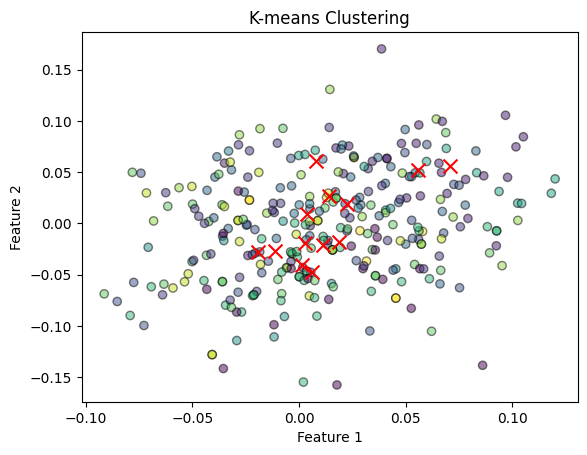

In [15]:
import matplotlib.pyplot as plt

# Scatter plot of the data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', alpha=0.5, edgecolors='k')

# Plot the cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100)

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')

# Show the plot
plt.show()


### 4.3 Visualisation aprés réduction de dimensions (Application de ACP)
RQ: Puisque notre code source a été représenté avec 299 caractéristiques, nous avons effectué une réduction de dimensionnalité pour passer à un espace de représentation plus petit.

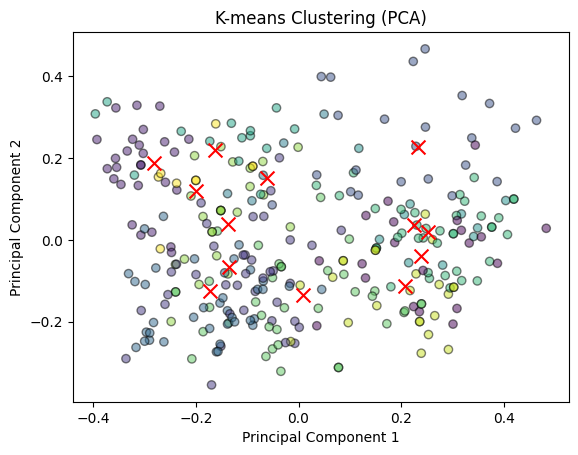

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce the dimensionality to 2 or 3 dimensions
pca = PCA(n_components=2)  # You can change the number of components as needed
X_pca = pca.fit_transform(X_test)

# Scatter plot of the data points after PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', alpha=0.5, edgecolors='k')

# Plot the cluster centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=100)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering (PCA)')

# Show the plot
plt.show()


# 5-Analyse 

* KNN est un algorithme d'apprentissage supervisé principalement utilisé pour les tâches de classification, où il attribue une étiquette à un point de données en fonction des étiquettes de ses voisins les plus proches dans l'espace des caractéristiques. En revanche, le regroupement K-means est un algorithme d'apprentissage non supervisé utilisé pour les tâches de regroupement, où il partitionne les points de données en clusters distincts en fonction de leurs similitudes dans l'espace des caractéristiques. Dans cet exemple, nous avons tenté de former un classifieur pour attribuer une classe représentant le design pattern correspondant à un vecteur caractéristique du code source.



<div style="text-align:center">
    <img src="images/Patterns.png" alt="Les patterns">
</div>


* Une distinction clé entre KNN et K-means réside dans leurs objectifs et leurs hypothèses sous-jacentes. KNN vise à prédire l'étiquette de classe d'un point de données donné en identifiant des instances similaires dans l'ensemble d'entraînement. Il suppose que des points de données similaires ont tendance à appartenir à la même classe, ce qui le rend approprié pour les tâches où des données étiquetées sont disponibles, telles que la classification.

* En revanche, le regroupement K-means vise à partitionner les points de données en clusters en fonction de leur proximité avec les centroïdes de ces clusters. Il suppose que les points de données à l'intérieur du même cluster sont plus similaires les uns aux autres qu'à ceux des autres clusters, ce qui le rend utile pour découvrir les structures et les motifs inhérents dans les ensembles de données non étiquetés.

* Une autre différence réside dans leur complexité computationnelle et leur extensibilité. KNN nécessite de stocker et de comparer chaque point de données avec tous les autres points de données dans l'ensemble d'entraînement, ce qui entraîne un coût computationnel élevé, en particulier pour les grands ensembles de données. En revanche, le regroupement K-means implique une optimisation itérative pour minimiser la distance entre les points de données et les centroïdes des clusters, ce qui le rend efficace en termes de calcul et extensible aux grands ensembles de données.